In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance

# Local Functions

In [186]:
def imgs_and_hists(*imgs, ylim=None, bins=256):
    fig, axs = plt.subplots(len(imgs), len(imgs), figsize=(14, 7))
    axs = axs.ravel() # That's because: _, ((ax1, ax2), (ax3, ax4)) <- plt.subplots(2, 2)
    for i in range(len(imgs)):
        axs[i].imshow(imgs[i], cmap="gray")
        axs[i+len(imgs)].hist(np.array(imgs[i]).ravel(), bins=bins, color="black");
        if ylim:
            plt.ylim((0, ylim))

def imshow(*imgs, cmap=None):
    fig, axs = plt.subplots(1, len(imgs), figsize=(10, 5))
    try:
        axs = axs.ravel()
    except:
        axs = [axs] # case only one img
    for i in range(len(imgs)):
        axs[i].imshow(imgs[i], cmap=cmap)

# Importar imagens

In [192]:
img1 = Image.open("D1.BMP")
img2 = Image.open("N1.bmp")

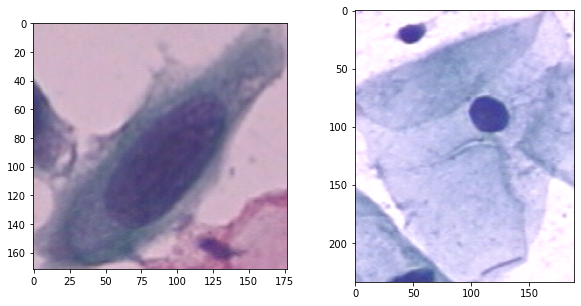

In [193]:
imshow(img1, img2)

# Conversão para Preto e Branco

In [194]:
img1 = Image.fromarray(cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2GRAY))
img2 = Image.fromarray(cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2GRAY))

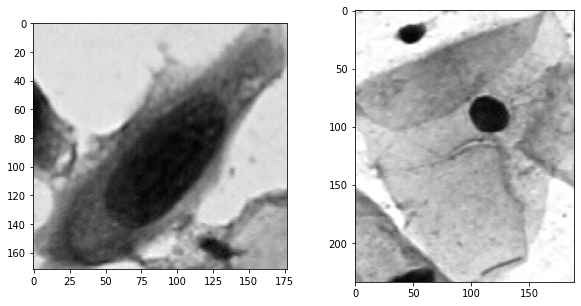

In [195]:
imshow(img1, img2, cmap="gray")

# Realçar contornos
(membranas celulares e seus núcleos)

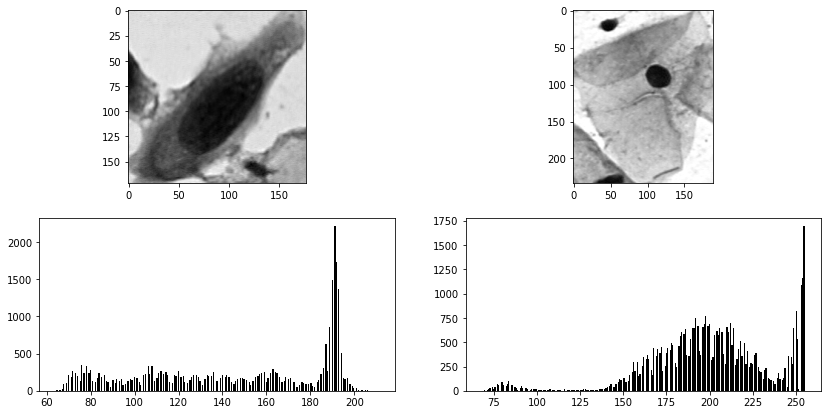

In [196]:
# Verificar Histograma antes de pré-processamento
imgs_and_hists(img1, img2)

## Imagens Preto e Branco

### Brilho

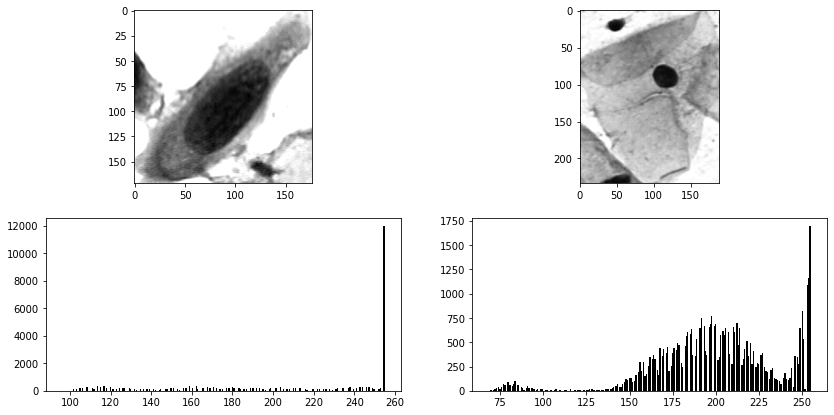

In [197]:
enhancer1 = ImageEnhance.Brightness(img1)
img1 = enhancer1.enhance(1.5)

enhancer2 = ImageEnhance.Brightness(img2)
en2 = enhancer2.enhance(1)

imgs_and_hists(img1, en2)

### Constrate

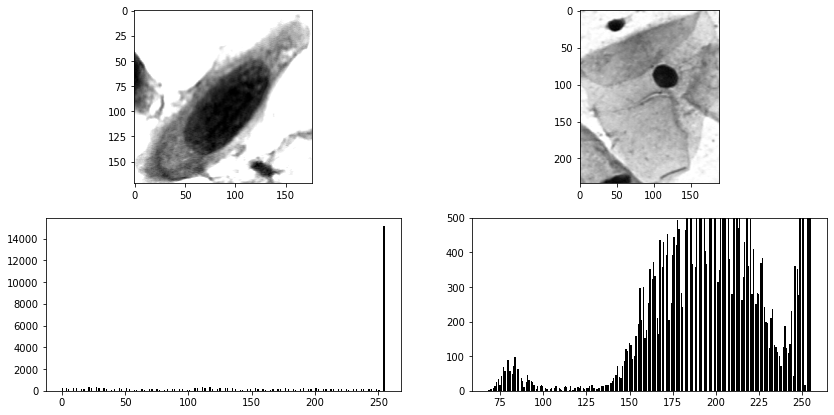

In [198]:
enhancer1 = ImageEnhance.Contrast(img1)
img1 = enhancer1.enhance(2)

enhancer2 = ImageEnhance.Contrast(en2)
en2 = enhancer2.enhance(1)

imgs_and_hists(img1, en2, ylim=500)

### Filtros

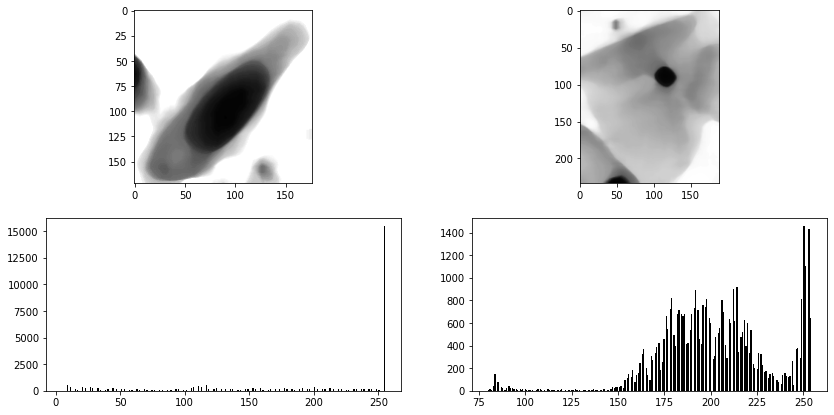

In [199]:
ksize = 21
img1 = cv2.medianBlur(np.array(img1), ksize)

ksize = 25
en2 = cv2.medianBlur(np.array(en2), ksize)

imgs_and_hists(img1, en2)

# Segmentar Núcleo e Citoplasma

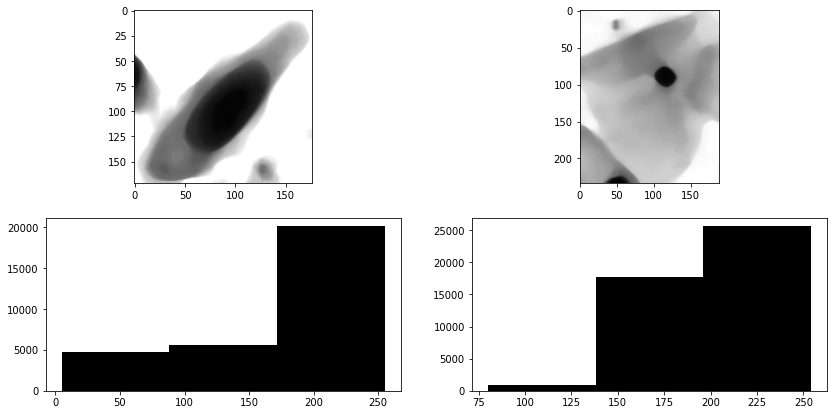

In [200]:
# Gross Visualization of main bins present (nucleus, cytoplasm and background)
# 
# img1:
#   nucleus: 0 -> 90
#   cytoplasm: 90 -> 170
#   background: 170 -> 255
#
# img2:
#   nucleus: 0 -> 63
#   cytoplasm: 63 -> 138
#   background: 138 -> 255

imgs_and_hists(img1, en2, bins=3)

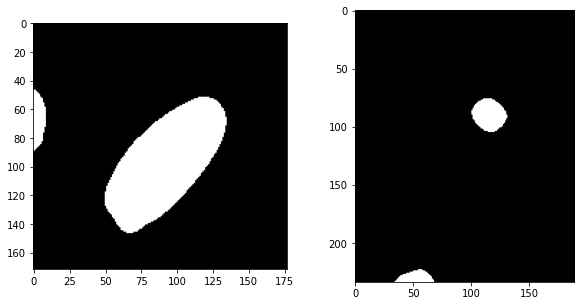

In [202]:
# Threshold nucleus
_, img1_nuc = cv2.threshold(img1, 90, 128, cv2.THRESH_BINARY_INV)
_, img2_nuc = cv2.threshold(img2, 138, 128, cv2.THRESH_BINARY_INV)
imshow(img1_nuc, img2_nuc, cmap="gray")

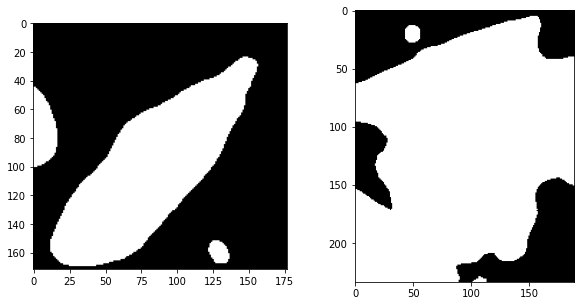

In [203]:
# Threshold cytoplasm
_, img1_cyto = cv2.threshold(img1, 170, 255, cv2.THRESH_BINARY_INV)
_, img2_cyto = cv2.threshold(img2, 219, 255, cv2.THRESH_BINARY_INV)
imshow(img1_cyto, img2_cyto, cmap="gray")

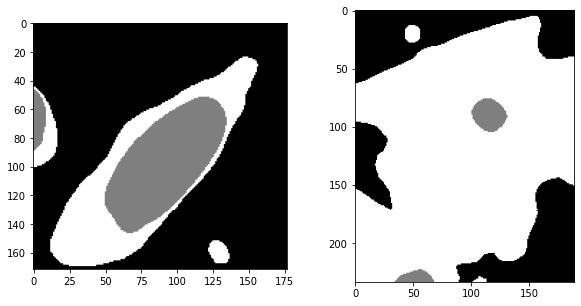

In [204]:
imshow((img1_nuc+img1_cyto), (img2_nuc+img2_cyto), cmap="gray")